In [113]:
import torch as torch
from sklearn.model_selection import train_test_split
import os
import h5py
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
import tqdm as tqdm

In [154]:

f = h5py.File('processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth_0.z', 'r')
treeArray = f['t_allpar_new'][()]

features = ['j_zlogz', 'j_c1_b0_mmdt','j_c1_b1_mmdt', 'j_c1_b2_mmdt' , 'j_c2_b1_mmdt',
            'j_c2_b2_mmdt', 'j_d2_b1_mmdt', 'j_d2_b2_mmdt', 'j_d2_a1_b1_mmdt', 'j_d2_a1_b2_mmdt', 'j_m2_b1_mmdt', 'j_m2_b2_mmdt', 'j_n2_b1_mmdt', 
            'j_n2_b2_mmdt', 'j_mass_mmdt', 'j_multiplicity']
labels = ['j_g', 'j_q', 'j_w', 'j_z', 'j_t']
features_labels_df = pd.DataFrame(treeArray, columns = features + labels)
features_labels_df = features_labels_df.drop_duplicates()
features_val = features_labels_df[features].values

labels_val = features_labels_df[labels].values

X_train, X_test, y_train, y_test = train_test_split(features_val,labels_val,test_size = 0.2, random_state = 42)


In [156]:
features_labels_df[features]

,j_zlogz,j_c1_b0_mmdt,j_c1_b1_mmdt,j_c1_b2_mmdt,j_c2_b1_mmdt,j_c2_b2_mmdt,j_d2_b1_mmdt,j_d2_b2_mmdt,j_d2_a1_b1_mmdt,j_d2_a1_b2_mmdt,j_m2_b1_mmdt,j_m2_b2_mmdt,j_n2_b1_mmdt,j_n2_b2_mmdt,j_mass_mmdt,j_multiplicity
0,-2.581735,0.360516,0.006662,0.000171,0.013948,0.000422,2.093754,2.474129,2.093754,0.277694,0.104902,0.056527,0.380295,0.237902,9.118754,51.0
51,-2.523018,0.417621,0.002757,0.000022,0.003628,0.000031,1.316059,1.429556,1.316059,0.269679,0.135626,0.089533,0.365181,0.270588,4.916279,50.0
101,-3.250554,0.475789,0.044752,0.007102,0.044097,0.002706,0.985350,0.380992,0.985350,0.147550,0.081577,0.022395,0.233933,0.064426,93.091446,41.0
142,-1.614966,0.339665,0.005418,0.000103,0.005924,0.000118,1.093580,1.154737,1.093580,0.167316,0.078482,0.041072,0.231305,0.125788,11.588943,19.0
161,-2.667992,0.430151,0.018264,0.001292,0.032269,0.002315,1.766780,1.791398,1.766780,0.231735,0.097208,0.052539,0.361141,0.237263,36.723331,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5131388,-2.515444,0.439712,0.047173,0.007916,0.021762,0.001074,0.461329,0.135657,0.461329,0.068762,0.037569,0.009825,0.119903,0.030392,91.332115,29.0
5131417,-2.513489,0.438778,0.034054,0.006001,0.048145,0.003809,1.413808,0.634772,1.413808,0.120105,0.051220,0.012449,0.230694,0.069452,81.564148,30.0
5131447,-3.028774,0.467739,0.106122,0.036287,0.126444,0.036140,1.191488,0.995961,1.191488,0.206012,0.092529,0.052986,0.314933,0.210041,181.831253,39.0
5131486,-3.041004,0.464421,0.048529,0.007597,0.039453,0.002675,0.812969,0.352088,0.812969,0.140323,0.073849,0.024015,0.215294,0.068165,90.752228,44.0


In [22]:
X_train.shape

(79015, 16)

In [227]:
model = torch.nn.Sequential(
    torch.nn.Linear(16,64),
    torch.nn.ReLU(),
    torch.nn.Linear(64,32),
    torch.nn.ReLU(),
    torch.nn.Linear(32,16),
    torch.nn.ReLU(),
    torch.nn.Linear(16,5),
    torch.nn.Softmax())

In [228]:
model

Sequential(
  (0): Linear(in_features=16, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=16, bias=True)
  (5): ReLU()
  (6): Linear(in_features=16, out_features=5, bias=True)
  (7): Softmax(dim=None)
)

In [229]:
learning_rate = 1e-4
dataloader = DataLoader(X_train, batch_size=64, shuffle=False, sampler=None,
           batch_sampler=None, num_workers=0, collate_fn=None,
           pin_memory=False, drop_last=False, timeout=0,
           worker_init_fn=None)
ydataloader = DataLoader(y_train, batch_size=64, shuffle=False, sampler=None,
           batch_sampler=None, num_workers=0, collate_fn=None,
           pin_memory=False, drop_last=False, timeout=0,
           worker_init_fn=None)

In [230]:
loss_fn = torch.nn.CrossEntropyLoss()

In [231]:
trainloss = np.zeros(100)
valloss = np.zeros(100)
for t in range(100):
    for x,y in zip(dataloader,ydataloader):
        # Forward pass: compute predicted y by passing x to the model. Module objects
        # override the __c|all__ operator so you can call them like functions. When
        # doing so you pass a Tensor of input data to the Module and it produces
        # a Tensor of output data.
        y_pred = model(x.float())

        loss = loss_fn(y_pred, torch.max(y.float(),1)[1])

        # Zero the gradients before running the backward pass.
        model.zero_grad()

        # Backward pass: compute gradient of the loss with respect to all the learnable
        # parameters of the model. Internally, the parameters of each Module are stored
        # in Tensors with requires_grad=True, so this call will compute gradients for
        # all learnable parameters in the model.
        loss.backward()
        trainloss[t] = loss
        # Update the weights using gradient descent. Each parameter is a Tensor, so
        # we can access its gradients like we did before.
        with torch.no_grad():
            for param in model.parameters():
                param -= learning_rate * param.grad
    y_pred = model(torch.from_numpy(X_test))
    yloss = loss_fn(y_pred, torch.max(torch.from_numpy(y_test),1)[1])
    valloss[t] = yloss
    print('Epoch' +' ' +str(t) + ' Train Loss:' +str(trainloss[t]))
    print('        ' + 'Val Loss:' + str(valloss[t]))

    

Epoch 0 Train Loss:1.595653772354126
        Val Loss:1.570233941078186
Epoch 1 Train Loss:1.589238166809082
        Val Loss:1.5648969411849976
Epoch 2 Train Loss:1.58346426486969
        Val Loss:1.560321569442749
Epoch 3 Train Loss:1.5774364471435547
        Val Loss:1.5557196140289307
Epoch 4 Train Loss:1.5712205171585083
        Val Loss:1.5510915517807007
Epoch 5 Train Loss:1.5642130374908447
        Val Loss:1.546049952507019
Epoch 6 Train Loss:1.556451439857483
        Val Loss:1.5405466556549072
Epoch 7 Train Loss:1.5451558828353882
        Val Loss:1.532477855682373
Epoch 8 Train Loss:1.534908652305603
        Val Loss:1.5260354280471802
Epoch 9 Train Loss:1.5251752138137817
        Val Loss:1.5201174020767212
Epoch 10 Train Loss:1.5158931016921997
        Val Loss:1.5148621797561646
Epoch 11 Train Loss:1.507468342781067
        Val Loss:1.5104217529296875
Epoch 12 Train Loss:1.5003035068511963
        Val Loss:1.5067682266235352
Epoch 13 Train Loss:1.4939806461334229
       

In [232]:
def learningCurve(trainloss,valloss):
    plt.figure(figsize=(10,8))
    plt.plot(trainloss)
    plt.plot(valloss)
    plt.title('Model Loss over Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['training sample loss','validation sample loss'])
    #plt.savefig('Learning_curve.pdf')
    plt.show()
    plt.close()

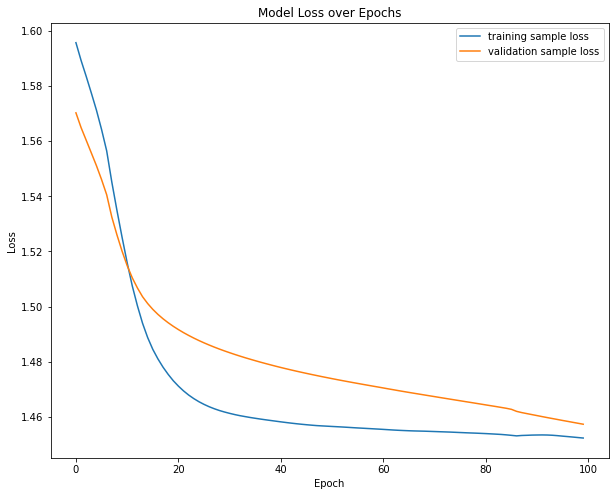

In [233]:
learningCurve(trainloss,valloss)

In [234]:
def makeRoc(features_val, labels_val, labels, model, outputDir='', outputSuffix=''):
    from sklearn.metrics import roc_curve, auc
    labels_pred = model(torch.from_numpy(features_val))
    df = pd.DataFrame()
    fpr = {}
    tpr = {}
    auc1 = {}
    plt.figure(figsize=(10,8))       
    g = labels_pred.detach().numpy()
    for i, label in enumerate(labels):
        df[label] = labels_val[:,i]
        df[label + '_pred'] = g[:,i]
        fpr[label], tpr[label], threshold = roc_curve(df[label],df[label+'_pred'])
        auc1[label] = auc(fpr[label], tpr[label])
        plt.plot(fpr[label],tpr[label],label='%s tagger, AUC = %.1f%%'%(label.replace('j_',''),auc1[label]*100.))
    plt.plot([0, 1], [0, 1], lw=1, color='black', linestyle='--')
    #plt.semilogy()
    plt.xlabel("Background Efficiency")
    plt.ylabel("Signal Efficiency")
    plt.xlim([-0.05, 1.05])
    plt.ylim(0.001,1.05)
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.figtext(0.25, 0.90,'DNN ROC Curve',fontweight='bold', wrap=True, horizontalalignment='right', fontsize=14)
    #plt.figtext(0.35, 0.90,'preliminary', style='italic', wrap=True, horizontalalignment='center', fontsize=14) 
    #plt.savefig('%sROC_%s.pdf'%(outputDir, outputSuffix))
    return labels_pred

/home/anrunw/anaconda3/envs/tensorflow/lib/python3.6/site-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


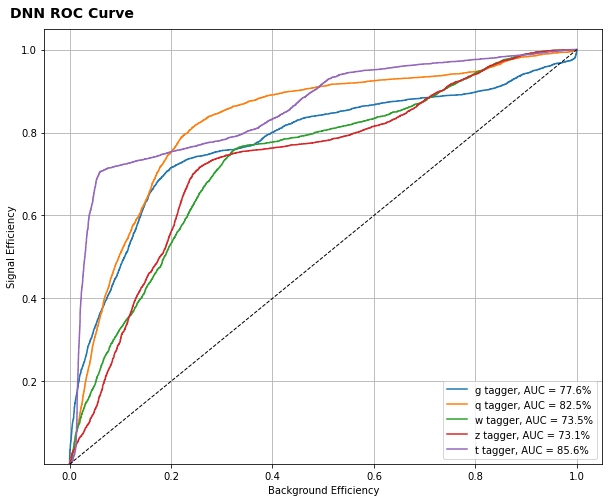

In [235]:
z = makeRoc(X_test, y_test, labels, model, outputSuffix='two-layer')